<a href="https://colab.research.google.com/github/hyyy11/colab0000/blob/main/12%EC%9D%BC%EC%B0%A8_0329.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 [==============================] - 9s 0us/step


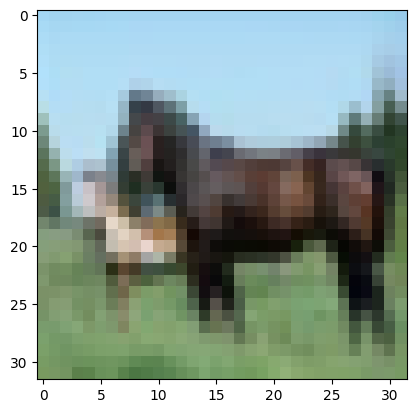

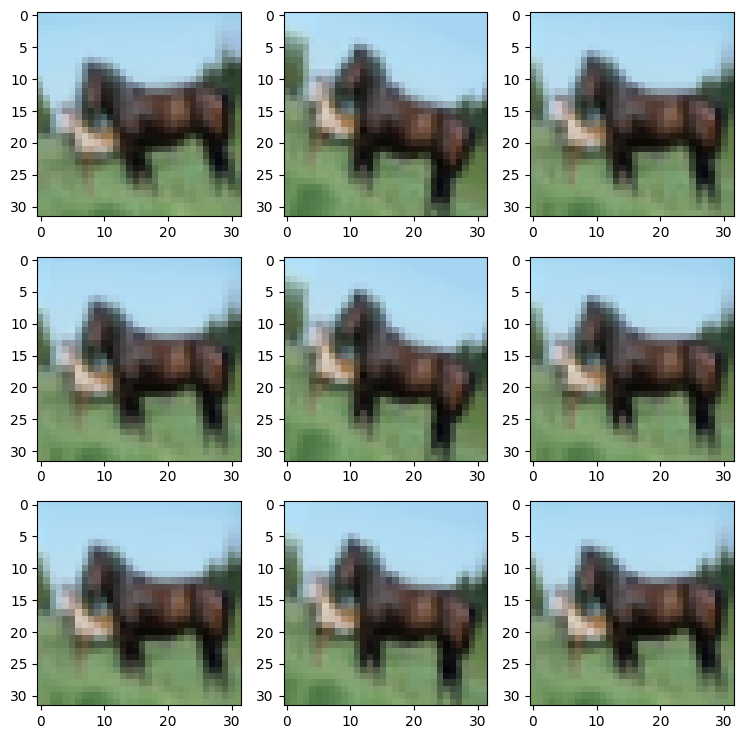

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator


(x_train, t_train), (x_test, t_test) = cifar10.load_data()


cifar10_labels = np.array(["airplane", "automobile", "bird", "cat", "dear", "dog", "frog", "horse", "ship", "truck"])
image = x_train[12]
plt.imshow(image)
plt.show()

def show_images(image, generator):
    channel, height, width = image.shape
    image = image.reshape(1, channel, height, width)       #배치 대응
    gen = generator.flow(image, batch_size=1)              #변환된 이미지의 생성


    plt.figure(figsize=(9, 9))
    for i in range(9):
        gen_img = gen.next()[0].astype(np.uint8)           #이미지 취득
        plt.subplot(3, 3, i + 1)
        plt.imshow(gen_img)
    plt.show()


#-20도 에서 20도 범위에서 랜덤으로 회전을 실시하는 이미지 생성기
generator = ImageDataGenerator(rotation_range=20)
show_images(image, generator)

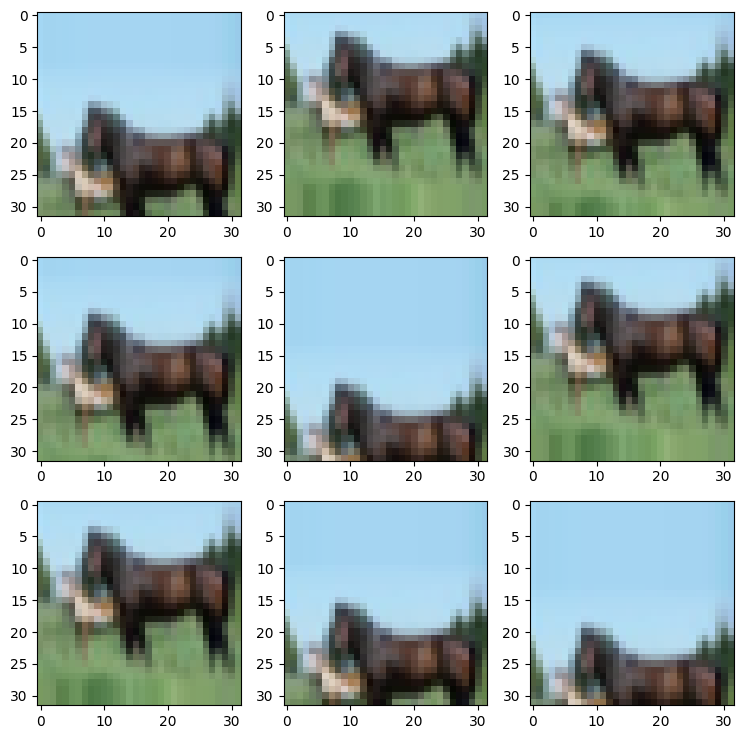

In [2]:
generator = ImageDataGenerator(width_shift_range=0.5)      #이미지 크기의 반의 범위에서 랜덤으로 시프트한다
show_images(image, generator)

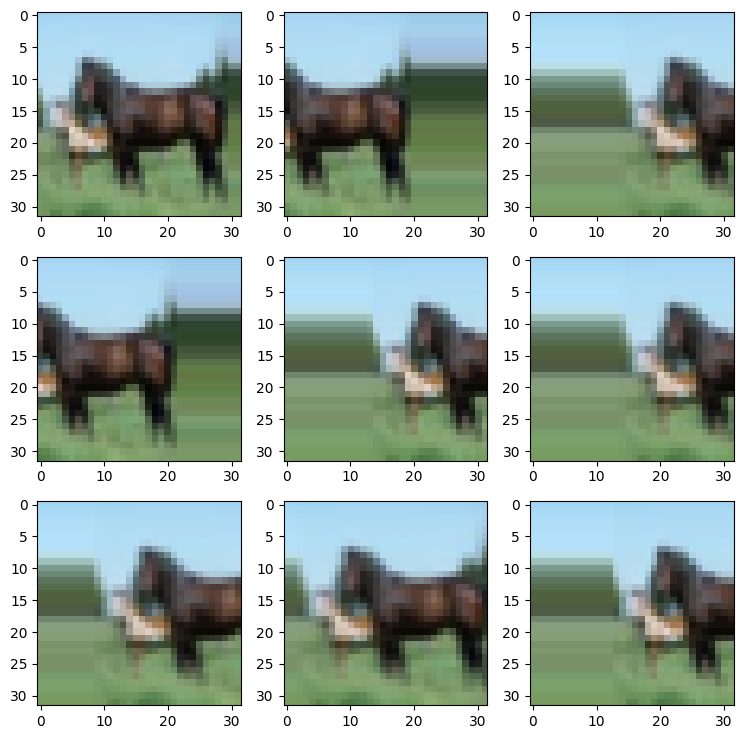

In [3]:
generator = ImageDataGenerator(height_shift_range=0.5)         #이미지 크기의 반의 범위에서 랜덤으로 시프트한다
show_images(image, generator)

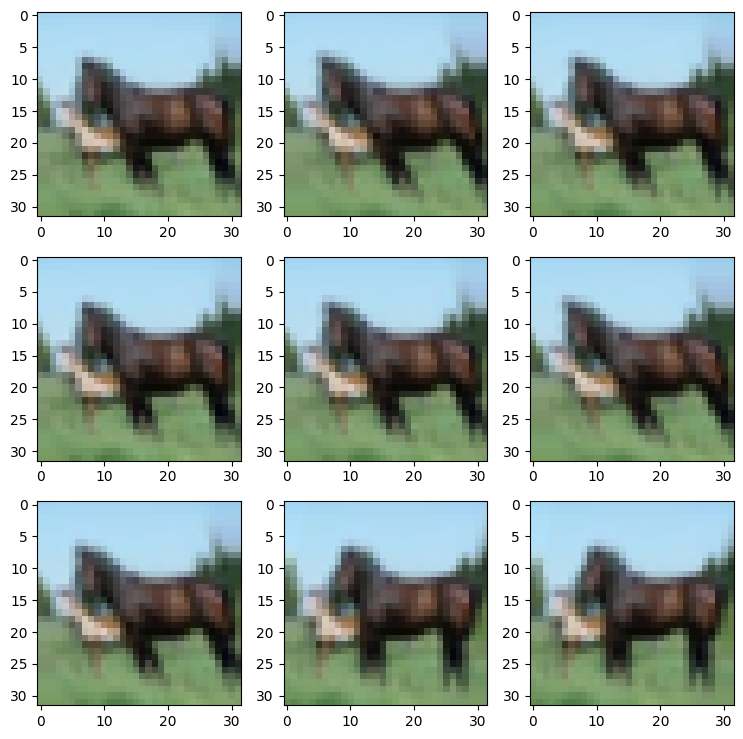

In [4]:
generator = ImageDataGenerator(shear_range=20)   #시어 강도의 범위를 지정
show_images(image, generator)

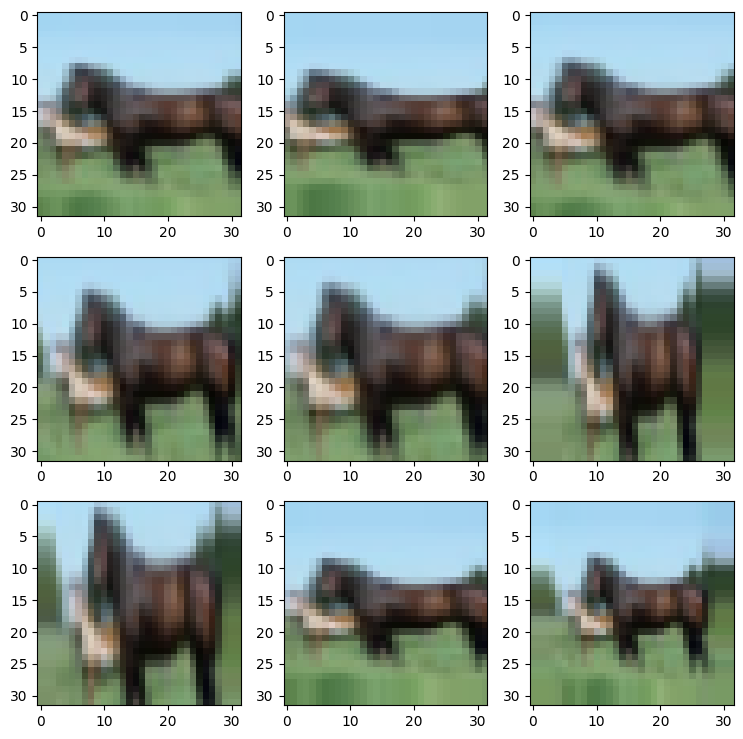

In [5]:
generator = ImageDataGenerator(zoom_range=0.4)      #확대 축소하는 범위를 지정
show_images(image, generator)

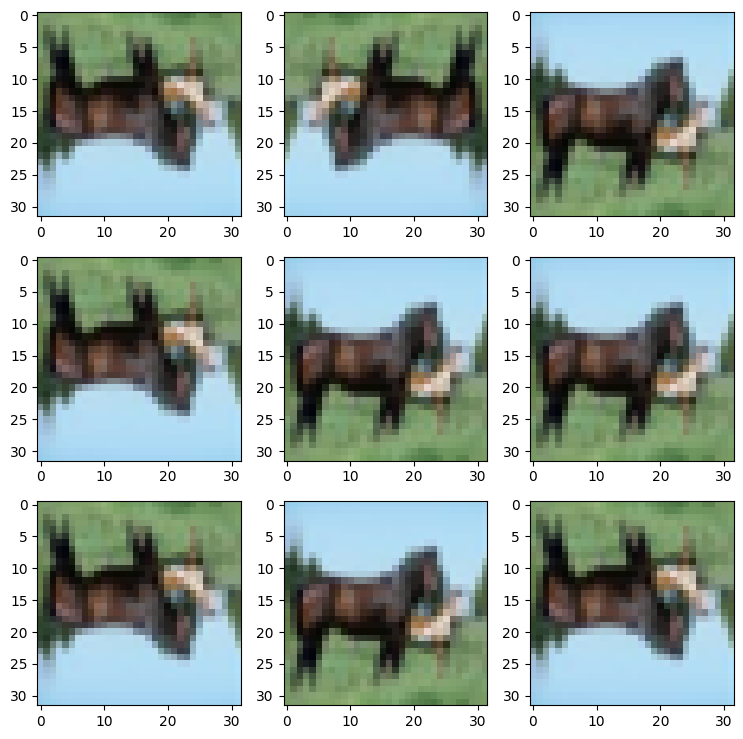

In [6]:
generator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)           #수평, 수직 방향으로 랜덤으로 반전
show_images(image, generator)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

batch_size = 32
epochs = 20
n_class = 10

t_train = tf.keras.utils.to_categorical(t_train, n_class)       #one-hot 표현으로 
t_test = tf.keras.utils.to_categorical(t_test, n_class)

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))     #제로 패딩, 배치 크기 이외의 이미지의 형태를 지정
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())           #1차원 배열로 변환
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))        #드롭 아웃
model.add(Dense(n_class))
model.add(Activation('softmax'))

#최적화 알고리즘에 Adam, 손실 함수에 교차 엔트로피를 지정해서 컴파일

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                        

In [8]:
x_train = x_train / 255   #0에서 1의 범위에 넣는다
x_test = x_test / 255

generator = ImageDataGenerator(
           rotation_range=0.2,          #랜덤으로 회전
           horizontal_flip=True)        #랜덤으로, 수평 방향으로 반전
generator.fit(x_train)

history = model.fit(generator.flow(x_train, t_train, batch_size=batch_size),    epochs = epochs, validation_data=(x_test, t_test))

Epoch 1/20
1563/1563 [==============================] - 43s 21ms/step - loss: 1.5277 - accuracy: 0.4418 - val_loss: 1.2204 - val_accuracy: 0.5652
Epoch 2/20
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1266 - accuracy: 0.6013 - val_loss: 0.9447 - val_accuracy: 0.6685
Epoch 3/20
1563/1563 [==============================] - 32s 21ms/step - loss: 0.9689 - accuracy: 0.6615 - val_loss: 0.8716 - val_accuracy: 0.6941
Epoch 4/20
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8688 - accuracy: 0.6970 - val_loss: 0.8122 - val_accuracy: 0.7174
Epoch 5/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8070 - accuracy: 0.7178 - val_loss: 0.7750 - val_accuracy: 0.7304
Epoch 6/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7594 - accuracy: 0.7333 - val_loss: 0.7366 - val_accuracy: 0.7422
Epoch 7/20
1563/1563 [==============================] - 32s 21ms/step - loss: 0.7211 - accuracy: 0.7481 - val_loss: 0.7427 -

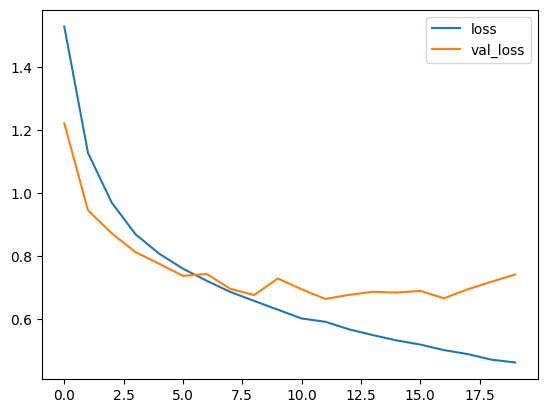

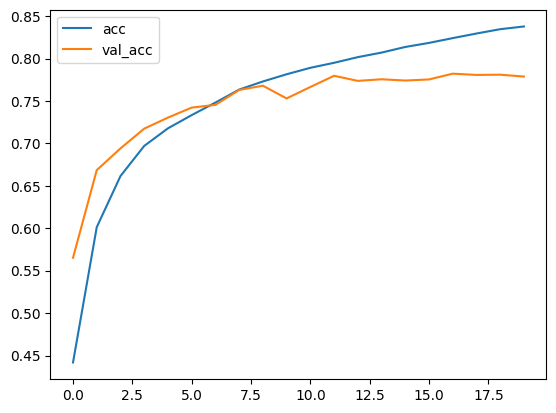

In [9]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']       #훈련용 데이터의 오차
train_acc = history.history['accuracy']    #훈련용 데이터의 정밀도
val_loss = history.history['val_loss']     #검증용 데이터의 오차
val_acc = history.history['val_accuracy']  #검증용 데이터의 정밀도

plt.plot(np.arange(len(train_loss)), train_loss, label='loss')
plt.plot(np.arange(len(val_loss)), val_loss, label='val_loss')
plt.legend()
plt.show()

plt.plot(np.arange(len(train_acc)), train_acc, label='acc')
plt.plot(np.arange(len(val_acc)), val_acc, label='val_acc')
plt.legend()
plt.show()

In [10]:
loss, accuracy = model.evaluate(x_test, t_test)
print("오차: ", loss, "정밀도: ", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.7411 - accuracy: 0.7788
오차:  0.7410793900489807 정밀도:  0.7788000106811523


1/1 [==============================] - 0s 22ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

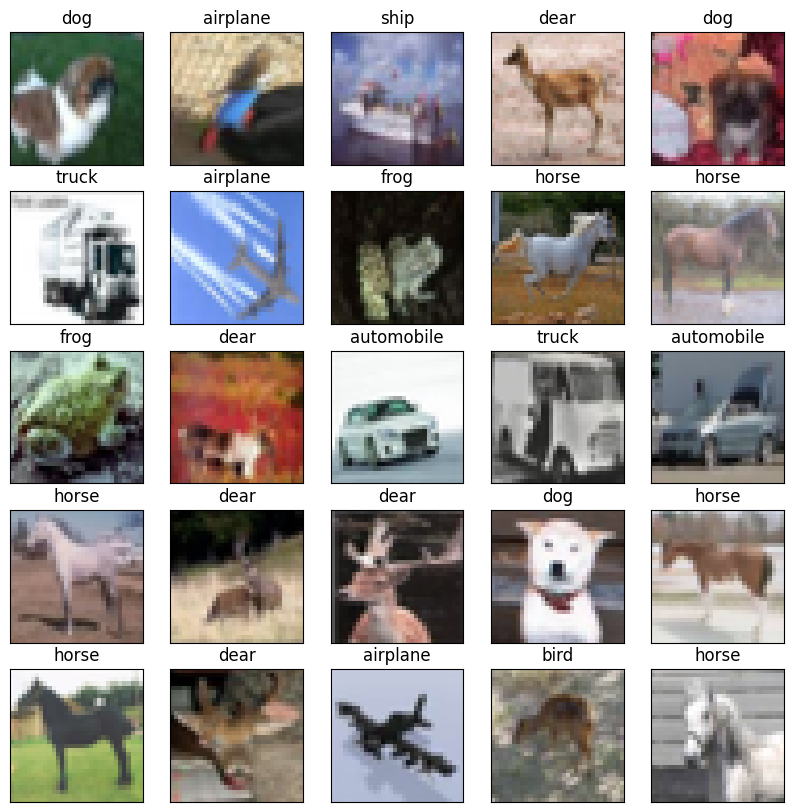

In [12]:
n_image = 25    #이미지의 표시 수
rand_idx = np.random.randint(0, len(x_test), n_image)      #난수

y_rand = model.predict(x_test[rand_idx])         #랜덤인 이미지를 입력으로서 예측
predicted_class = np.argmax(y_rand, axis=1)

plt.figure(figsize=(10,10))        #이미지의 표시 크기
for i in range(n_image):
    cifar_img=plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[rand_idx[i]])
    label = cifar10_labels[predicted_class[i]]       #라벨명의 취득
    plt.title(label)
    plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
plt.show

In [15]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [16]:
import os
from keras.models import load_model

path = '/content/drive/My Drive/cnn_cifar10/'

#디렉터리를 작성한다
if not os.path.exists(path):
    os.makedirs(path)

#파일을 저장한다
model.save(path + "model_cnn_cifar10.h5")